In [1]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull

from scipy import constants
cmap = matplotlib.cm.get_cmap('coolwarm')
kb = constants.physical_constants["Boltzmann constant in eV/K"][0]

### FCC - Liquid Phase diagram 

##### using arbitrary data

In [2]:
# Calculate configurational entropy 
def conf_entropy(x):
    S_f = -kb*((x*np.log(x))+((1-x)*np.log(1-x)))
    S_f[0] = 0
    S_f[-1] = 0
    return S_f

# Calculate Gibbs entropy 
def get_gibbs_energy(x, T, H_m,S_zero):
    enthalpy = x*(1-x)*H_m
    return enthalpy-(T*S_zero*conf_entropy(x))

In [3]:
conc = np.arange(0,1.0,0.01)
temp = np.arange(0,1000,60)
conc_list = conc.tolist()

##### Convex hull 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


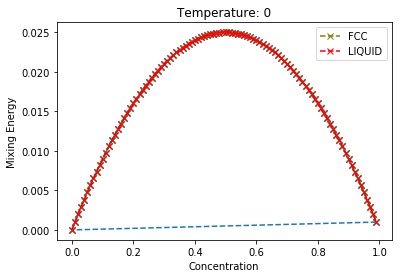

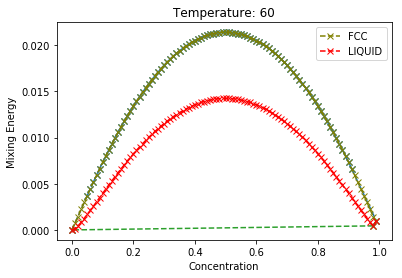

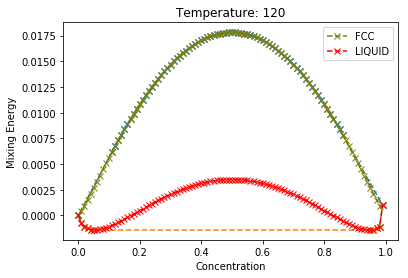

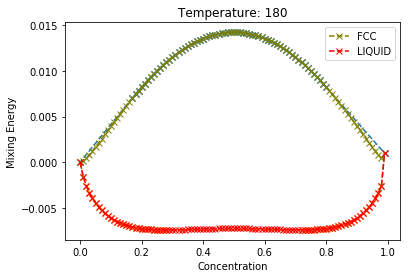

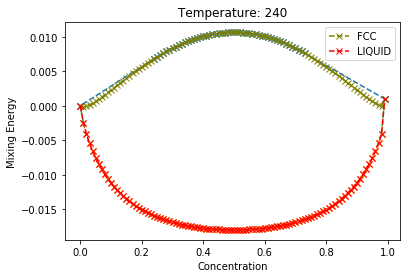

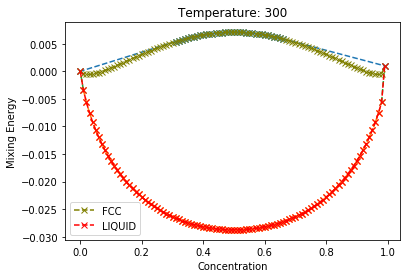

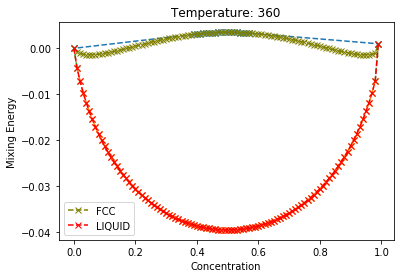

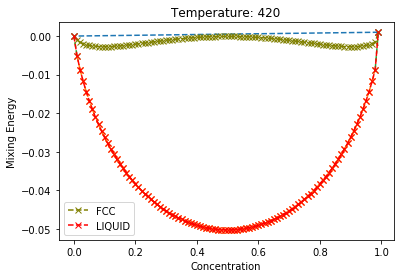

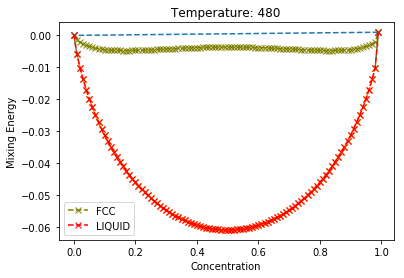

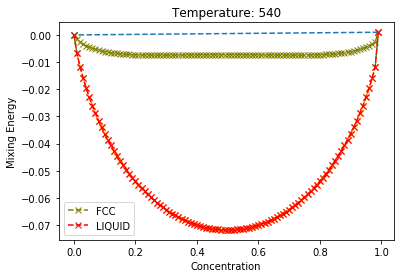

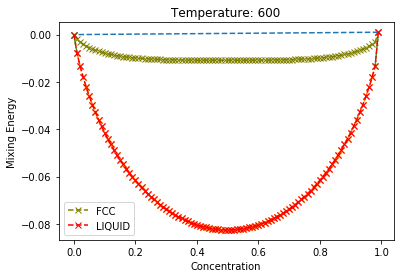

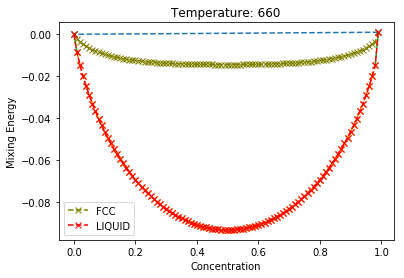

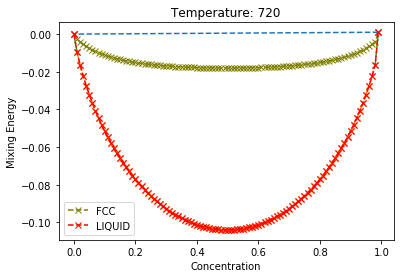

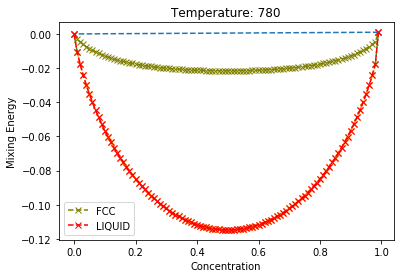

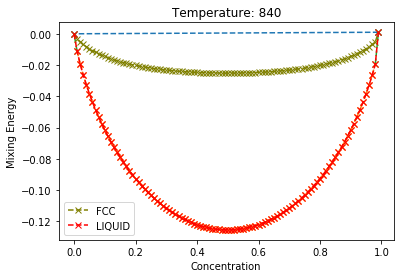

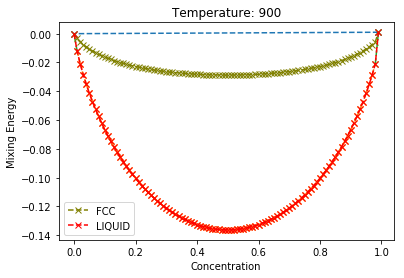

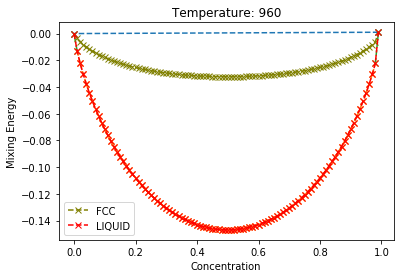

In [4]:
for t in temp:
    fcc = get_gibbs_energy(conc,T=t,H_m=0.1,S_zero=1)
    liq = get_gibbs_energy(conc,T=t,H_m=0.1,S_zero=3)

    fcc_list = fcc.tolist()
    liq_list = liq.tolist()
    
    # List of all phases 
    cry = np.array(["fcc"] * len(conc_list) + ["Liquid"] * len(conc_list))
    points = np.array([conc_list+conc_list,fcc_list+liq_list]).T
    
    # Convex Hull from scipy
    hull = ConvexHull(points)
    
    for simplex in hull.simplices:
        indices = points[simplex, 1]<=1000
        if all(indices):
            # Blue for BCC 
            if cry[simplex[0]] == cry[simplex[1]] and cry[simplex[0]] == "fcc":
                color="C0"
                
            # Orange for FCC 
            elif cry[simplex[0]] == cry[simplex[1]] and cry[simplex[0]] == "Liquid":
                color="C1"
                
            # Green for Mixed Phase
            else: 
                color="C2"
                
            # Plot Line for Convex Hull 
            plt.plot(points[simplex, 0][indices], points[simplex, 1][indices], 'x--', color=color)
    
    plt.plot(conc, fcc, "x--", label="FCC", color='olive')
    plt.plot(conc, liq, "x--", label="LIQUID", color='red')
    
    plt.title("Temperature: " + str(np.round(t, 2)))
    plt.xlabel('Concentration')
    plt.ylabel("Mixing Energy")
    
    plt.legend()
    plt.show()
    plt.show()

### Phase diagram

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Temperature')

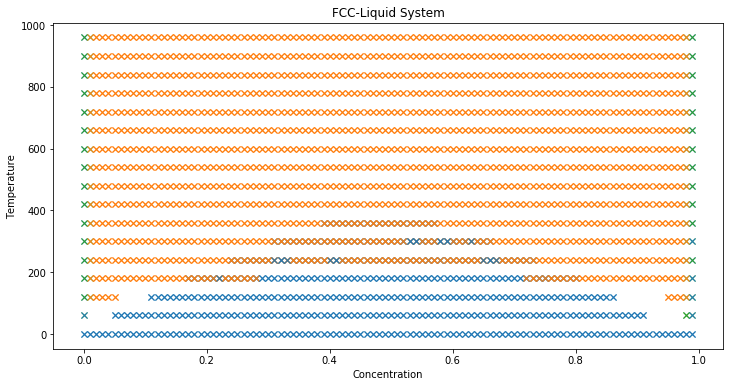

In [5]:
fig, axs = plt.subplots(1, 1, figsize=(12,6))
axs.set_title("FCC-Liquid System")

# Iterate over Temperature 
for t in temp:
    fcc = get_gibbs_energy(conc,T=t,H_m=0.1,S_zero=1)
    liq = get_gibbs_energy(conc,T=t,H_m=0.1,S_zero=3)

    fcc_list = fcc.tolist()
    liq_list = liq.tolist()
    
    points = np.array([conc_list+conc_list,fcc_list+liq_list]).T
    
    # Convex Hull from scipy
    hull = ConvexHull(points)
    for simplex in hull.simplices:
        ind = points[simplex, 1]<=10
        if all(indices):
            # Blue for BCC 
            if cry[simplex[0]] == cry[simplex[1]] and cry[simplex[0]] == "fcc":
                color="C0"
                
            # Orange for FCC 
            elif cry[simplex[0]] == cry[simplex[1]] and cry[simplex[0]] == "Liquid":
                color="C1"
                
            # Green for Mixed Phase
            else: 
                color="C2"
                
            # Plot Line for Convex Hull 
            axs.plot(points[simplex, 0][indices], [t, t], 'x', color=color)

# Add Labels 
axs.set_xlabel('Concentration')
axs.set_ylabel("Temperature")

### Formation diagrams within a phase
For eg: Fe$_{3}$C to Cr$_{3}$C with the addition of Cr, thus one can use the following code to plot the phase diagram of (Fe,Cr)$_{3}$C

In [6]:
conc, delta_conc = np.linspace(0,1.0,50,retstep=True)
T = np.arange(0,1000,20)

TT, XX = np.meshgrid(T,conc)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


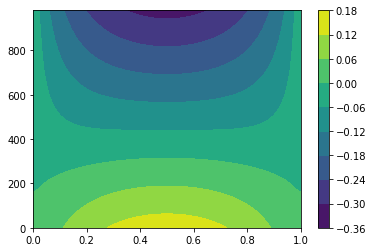

In [7]:
G = get_gibbs_energy(XX,TT,H_m=0.6,S_zero=8) 
plt.contourf(XX,TT,G)
plt.colorbar()

#### Convex hull

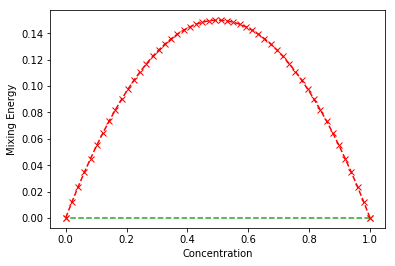

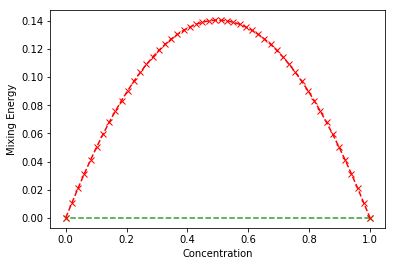

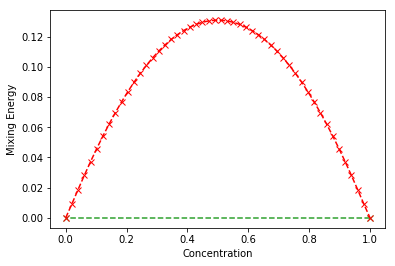

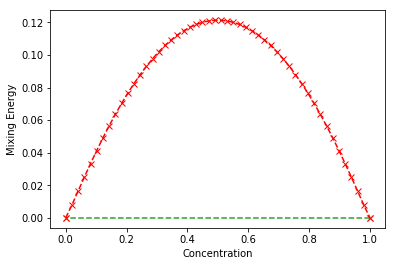

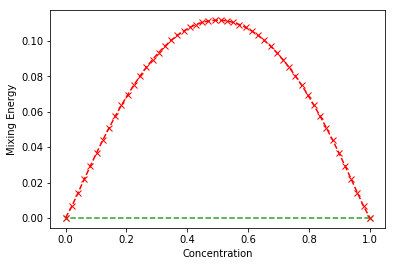

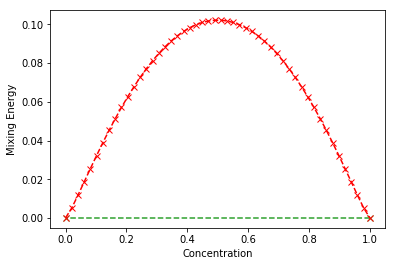

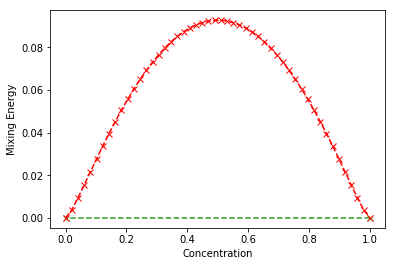

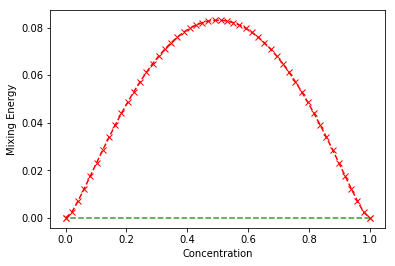

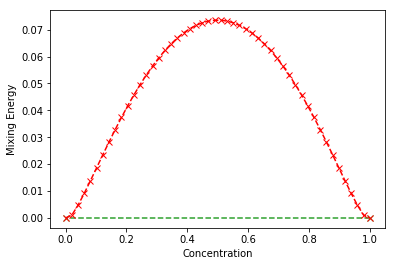

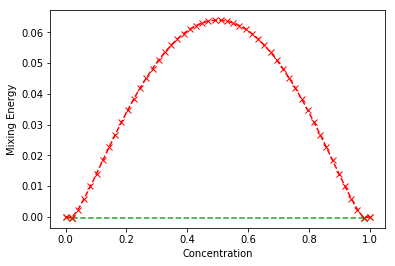

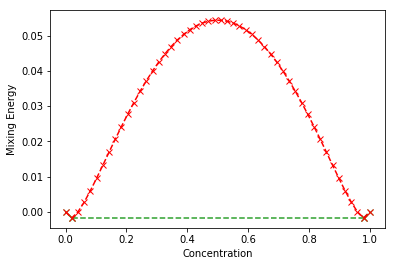

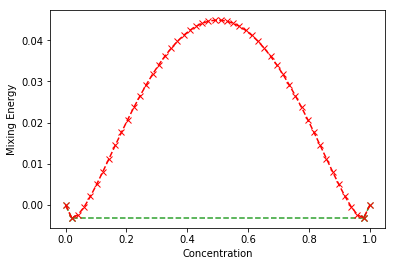

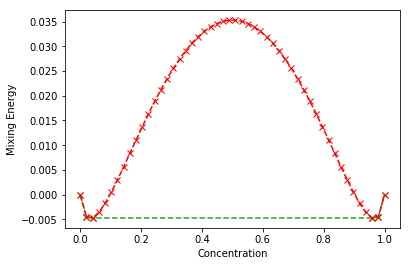

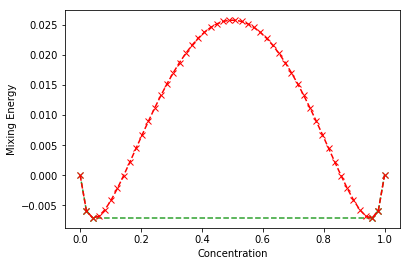

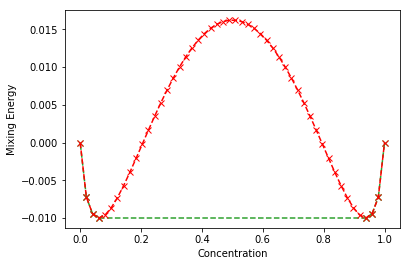

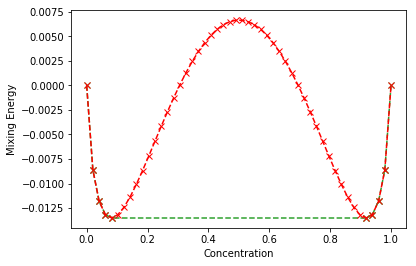

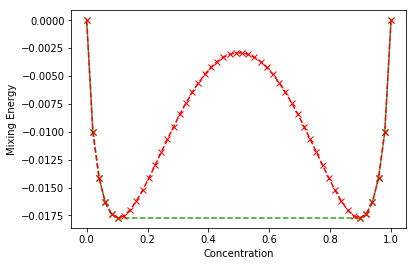

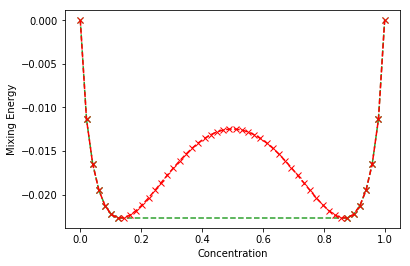

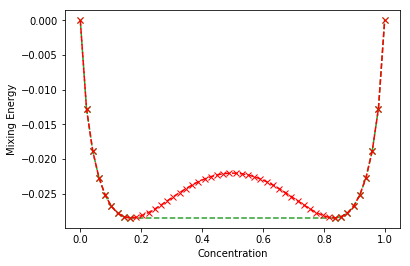

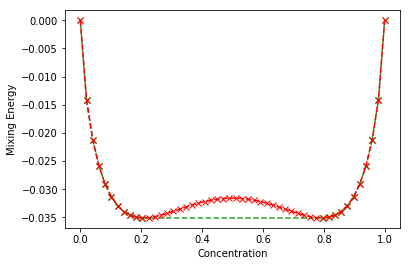

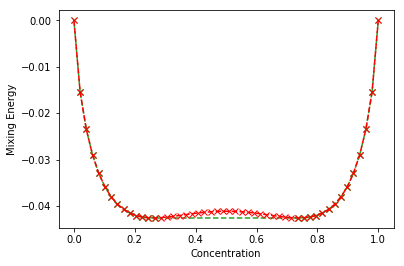

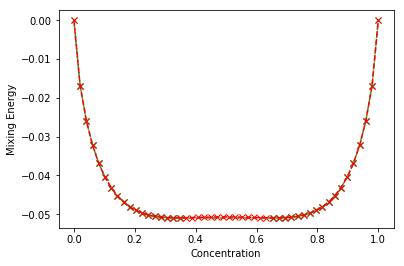

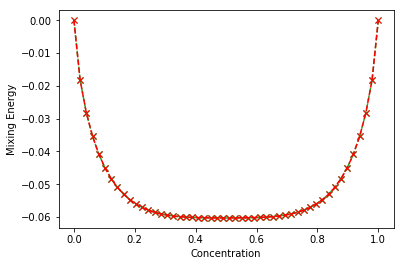

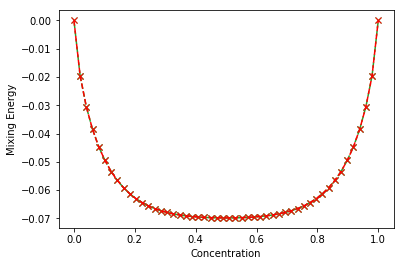

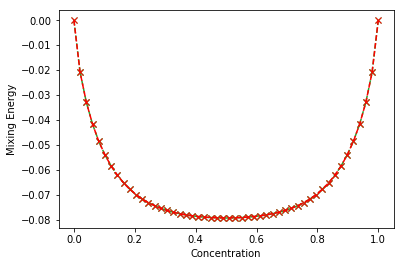

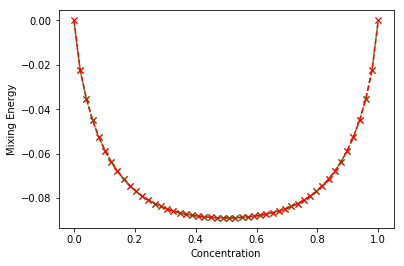

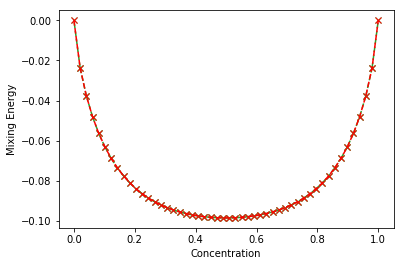

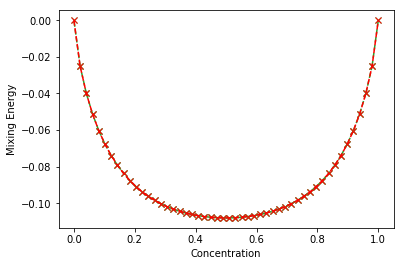

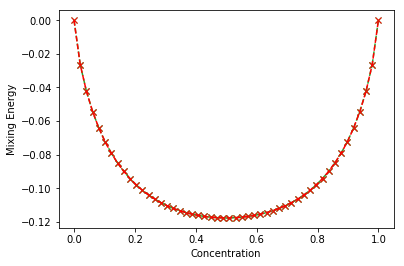

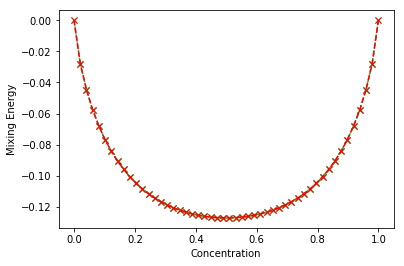

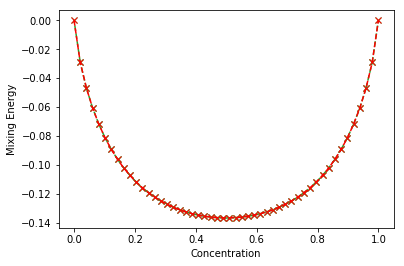

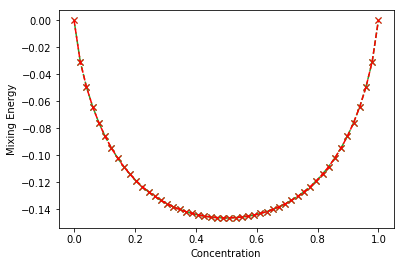

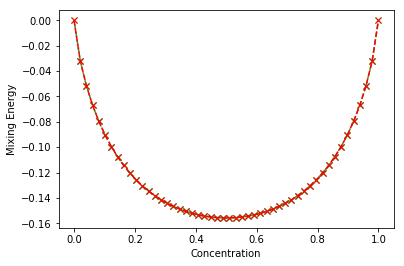

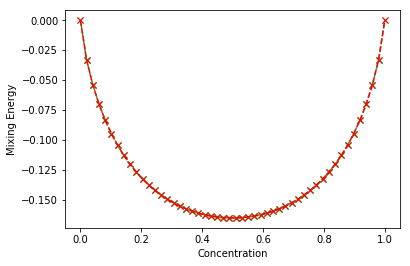

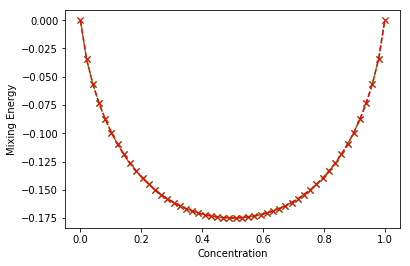

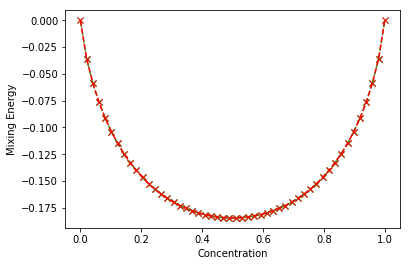

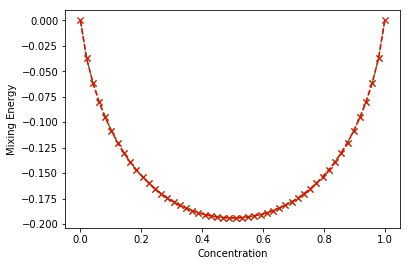

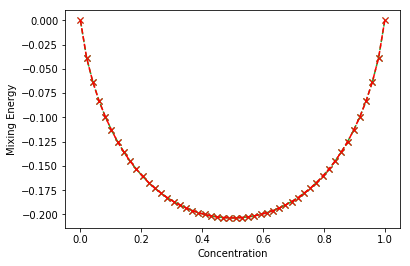

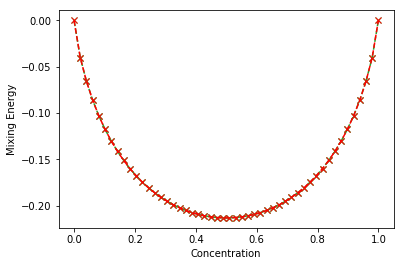

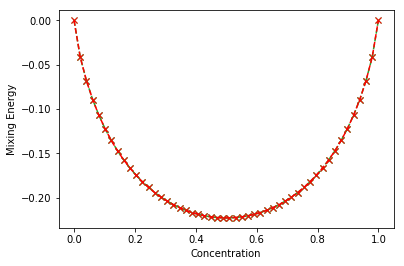

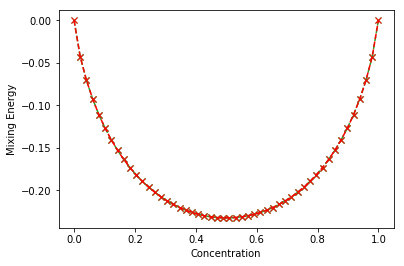

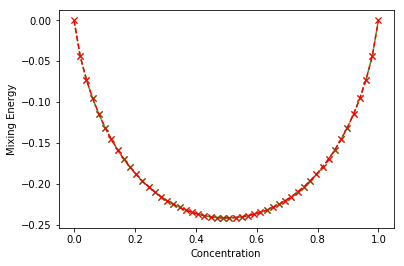

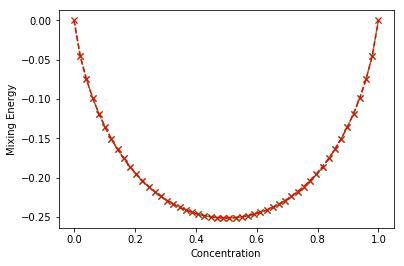

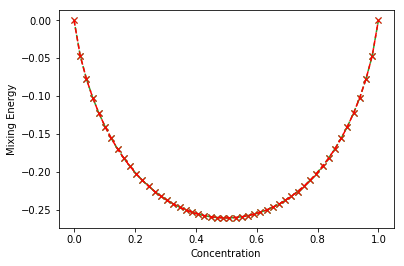

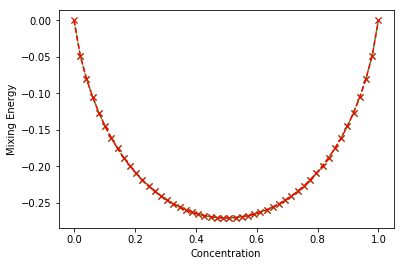

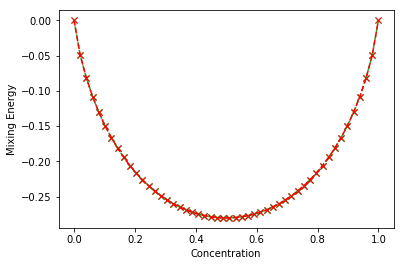

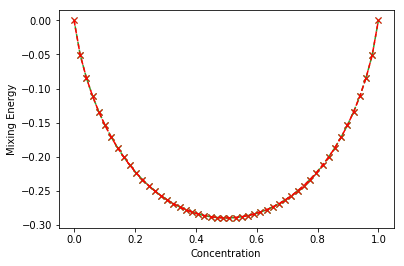

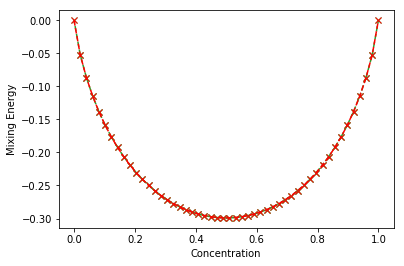

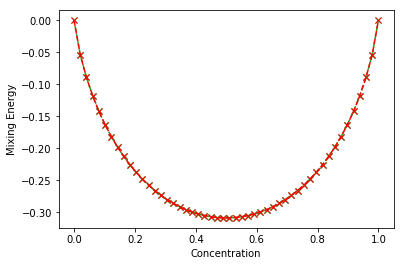

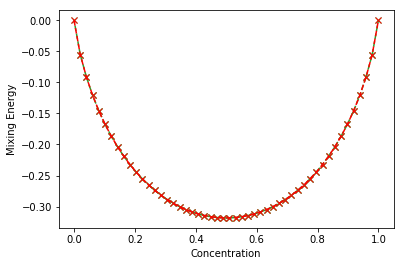

In [8]:
for i,t in enumerate(TT.T):
    conc_x = XX.T[i]
    energy = G.T[i]
    len(conc_x)
    points = np.array([conc_x,energy]).T
    points = np.append(points,[[0,10000],[1,10000]], axis=0) 
    
    cry = np.array(len(points)*['Fe3C'])
    
    # Convex Hull from scipy
    hull = ConvexHull(points)
    
    for simplex in hull.simplices:
        ind = points[simplex, 1] <= 10000-1
        if all(ind):
            # Blue for BCC 
            if cry[simplex[0]] == cry[simplex[1]] and cry[simplex[0]] == "FCC":
                color="C0"
                
            # Green for Mixed Phase
            else: 
                color="C2"
                
            # Plot Line for Convex Hull 
            plt.plot(points[simplex, 0][ind], points[simplex, 1][ind], 'x--', color=color)
    
    plt.plot(conc_x, energy, "x--", color='red')
   
    plt.xlabel('Concentration')
    plt.ylabel("Mixing Energy")
    plt.show()

#### Phase diagram using convex hull

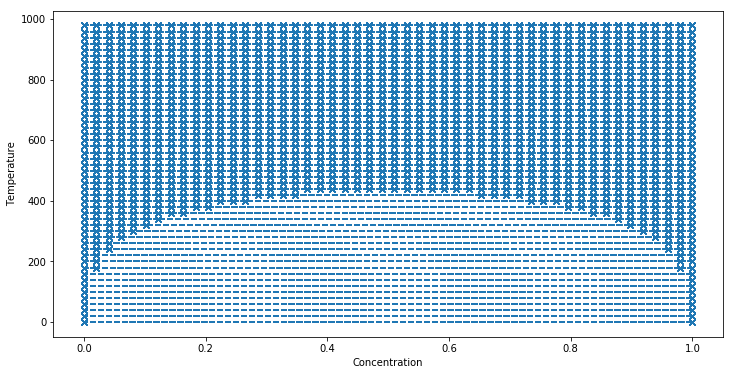

In [9]:
fig, axs = plt.subplots(1, 1, figsize=(12,6))
for i,t in enumerate(TT.T):
    conc_x = XX.T[i]
    energy = G.T[i]
    len(conc_x)
    points = np.array([conc_x,energy]).T
    points = np.append(points,[[0,10000],[1,10000]], axis=0) 
    
    cry = np.array(len(points)*['FCC'])
    
    # Convex Hull from scipy
    hull = ConvexHull(points)
    
    for simplex in hull.simplices:
        ind = points[simplex, 1] <= 10000-1
        if all(ind):
            # Blue for BCC 
            if cry[simplex[0]] == cry[simplex[1]] and cry[simplex[0]] == "FCC":
                color="C0"
                
            # Green for Mixed Phase
            else: 
                color="C2"
                
            # Plot Line for Convex Hull 
            axs.plot(points[simplex, 0][ind], [t, t], 'x--', color=color)
            axs.set_xlabel('Concentration')
            axs.set_ylabel("Temperature")

Replotting with a different colour to see the stability of (Fe,Cr)$_{3}$C at different temperatures

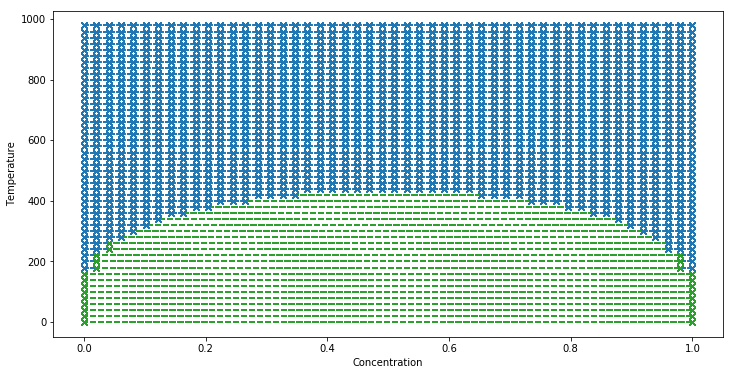

In [10]:
fig, axs = plt.subplots(1, 1, figsize=(12,6))
for i,t in enumerate(TT.T):
    conc_x = XX.T[i]
    energy = G.T[i]
    len(conc_x)
    points = np.array([conc_x,energy]).T
    points = np.append(points,[[0,10000],[1,10000]], axis=0) 
    
    cry = np.array(len(points)*['FCC'])
    
    # Convex Hull from scipy
    hull = ConvexHull(points)
    
    for simplex in hull.simplices:
        ind = points[simplex, 1] <= 10000-1
        pts = points[simplex, 0] 
        if all(ind):
            # Blue for BCC 
            if cry[simplex[0]] == cry[simplex[1]] and cry[simplex[0]] == "FCC":
                color="C0"
                if np.abs(np.diff(pts)) > 1.1*delta_conc:
                    color = 'C2'
            # Green for Mixed Phase
            #else: 
                #color="C2"
                
            # Plot Line for Convex Hull 
            axs.plot(points[simplex, 0][ind], [t, t], 'x--', color=color)
            axs.set_xlabel('Concentration')
            axs.set_ylabel("Temperature")

##### Different G

###### case 1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


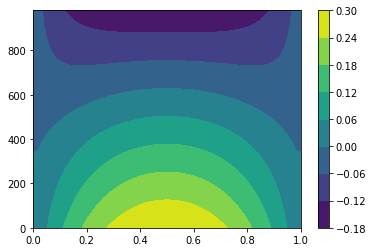

In [11]:
G = get_gibbs_energy(XX,TT,H_m=1.2,S_zero=8) 
plt.contourf(XX,TT,G)
plt.colorbar()

Text(0, 0.5, 'Temperature')

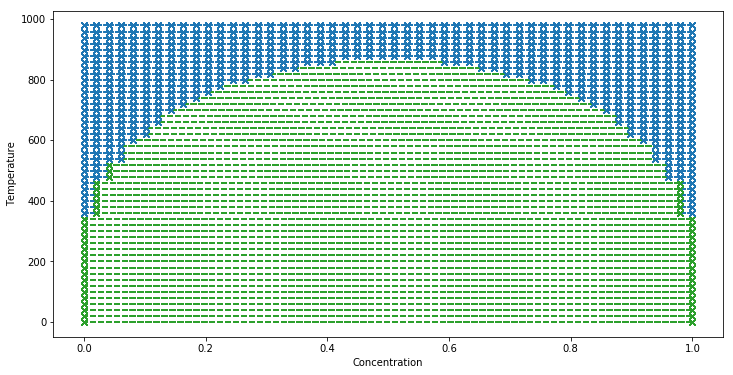

In [12]:
fig, axs = plt.subplots(1, 1, figsize=(12,6))

for i,t in enumerate(TT.T):
    conc_x = XX.T[i]
    energy = G.T[i]
    len(conc_x)
    points = np.array([conc_x,energy]).T
    points = np.append(points,[[0,10000],[1,10000]], axis=0) 
    
    cry = np.array(len(points)*['FCC'])
    
    # Convex Hull from scipy
    hull = ConvexHull(points)
    
    for simplex in hull.simplices:
        ind = points[simplex, 1] <= 10000-1
        pts = points[simplex, 0] 
        if all(ind):
            # Blue for BCC 
            if cry[simplex[0]] == cry[simplex[1]] and cry[simplex[0]] == "FCC":
                color="C0"
                if np.abs(np.diff(pts)) > 1.1*delta_conc:
                    color = 'C2'
            # Green for Mixed Phase
            #else: 
                #color="C2"
                
            # Plot Line for Convex Hull 
            axs.plot(points[simplex, 0][ind], [t, t], 'x--', color=color)
axs.set_xlabel('Concentration')
axs.set_ylabel("Temperature")

###### case 2 

In [13]:
conc, delta_conc = np.linspace(0,1.0,5,retstep=True)
conc, delta_conc

(array([0.  , 0.25, 0.5 , 0.75, 1.  ]), 0.25)

In [14]:
TT, XX = np.meshgrid(T,conc)

G = get_gibbs_energy(XX,TT,H_m=1.2,S_zero=8) 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


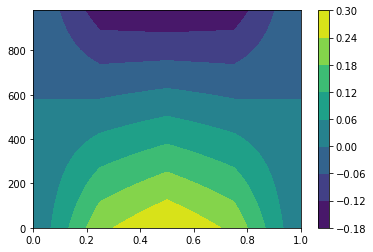

In [15]:
plt.contourf(XX,TT,G)
plt.colorbar()

Text(0, 0.5, 'Temperature')

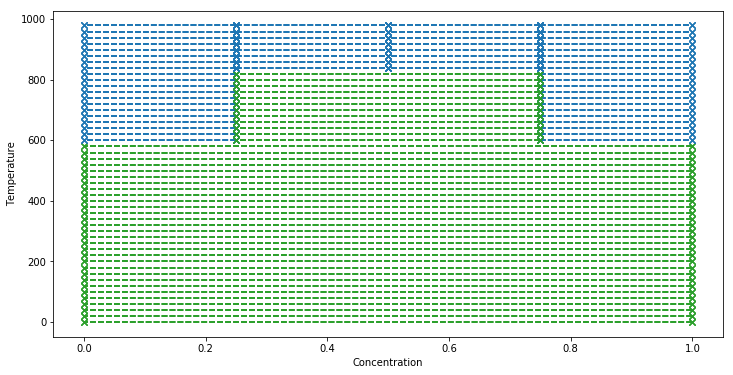

In [16]:
fig, axs = plt.subplots(1, 1, figsize=(12,6))

for i,t in enumerate(TT.T):
    conc_x = XX.T[i]
    energy = G.T[i]
    len(conc_x)
    points = np.array([conc_x,energy]).T
    points = np.append(points,[[0,10000],[1,10000]], axis=0) 
    
    cry = np.array(len(points)*['FCC'])
    
    # Convex Hull from scipy
    hull = ConvexHull(points)
    
    for simplex in hull.simplices:
        ind = points[simplex, 1] <= 10000-1
        pts = points[simplex, 0] 
        if all(ind):
            # Blue for BCC 
            if cry[simplex[0]] == cry[simplex[1]] and cry[simplex[0]] == "FCC":
                color="C0"
                if np.abs(np.diff(pts)) > 1.1*delta_conc:
                    color = 'C2'
            # Green for Mixed Phase
            #else: 
                #color="C2"
                
            # Plot Line for Convex Hull 
            axs.plot(points[simplex, 0][ind], [t, t], 'x--', color=color)
axs.set_xlabel('Concentration')
axs.set_ylabel("Temperature")